# Task 1

Download a dataset with three variables: sex, exang, num. 
Imagine that using a decision tree we want to classify whether or not a patient has heart disease 
(variable num), based on two characteristics: gender (sex) and the presence/absence of angina (exang). 
Train a decision tree on this data, using entropy as criterion

Specify what the Information Gain value will be for the variable that will be placed at the root of the tree.

The answer must indicate the number accurate to 3 decimal places.

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [2]:
tree = pd.read_csv('train_data_tree.csv')
print(tree.shape)
tree.head()

(238, 3)


,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1


In [3]:
X = tree.loc[:, ['sex', 'exang']]
y = tree['num']

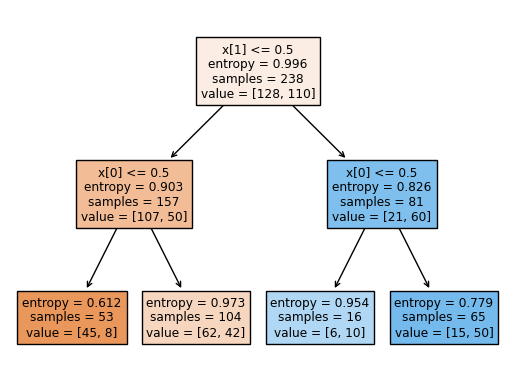

In [4]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X, y)
plot_tree(decision_tree=model, filled=True);

In [5]:
information_gain = 0.996 - ((157 * 0.903 / 238) + (81 * 0.826 / 238))
round(information_gain, 3)

0.119

# Task 2

Now that we've created a tree, let's train it and try to predict something!

First, let's test our tree on the classic iris set, which contains data on the length, width of sepals and petals of irises and their species affiliation. It is already built into sklearn, which is quite convenient.

So,
you are given 2 numpy arrays with measured characteristics of irises and their species affiliation. First, let's try a primitive method of splitting the data into 2 datasets. Use the train_test_split function to split the available data into training and test data sets, 75% and 25% respectively.
Then create a dt tree with default parameters and train it on the training data, and then predict the classes to which the data from the test set belongs, save the result of the predictions in the predicted variable.

```Python
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data
y = iris.target
```

In [6]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data
y = iris.target

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [8]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
predicted = dt.predict(X_test)
predicted

array([2, 0, 1, 0, 1, 2, 0, 0, 2, 0, 0, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2,
       2, 1, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1])

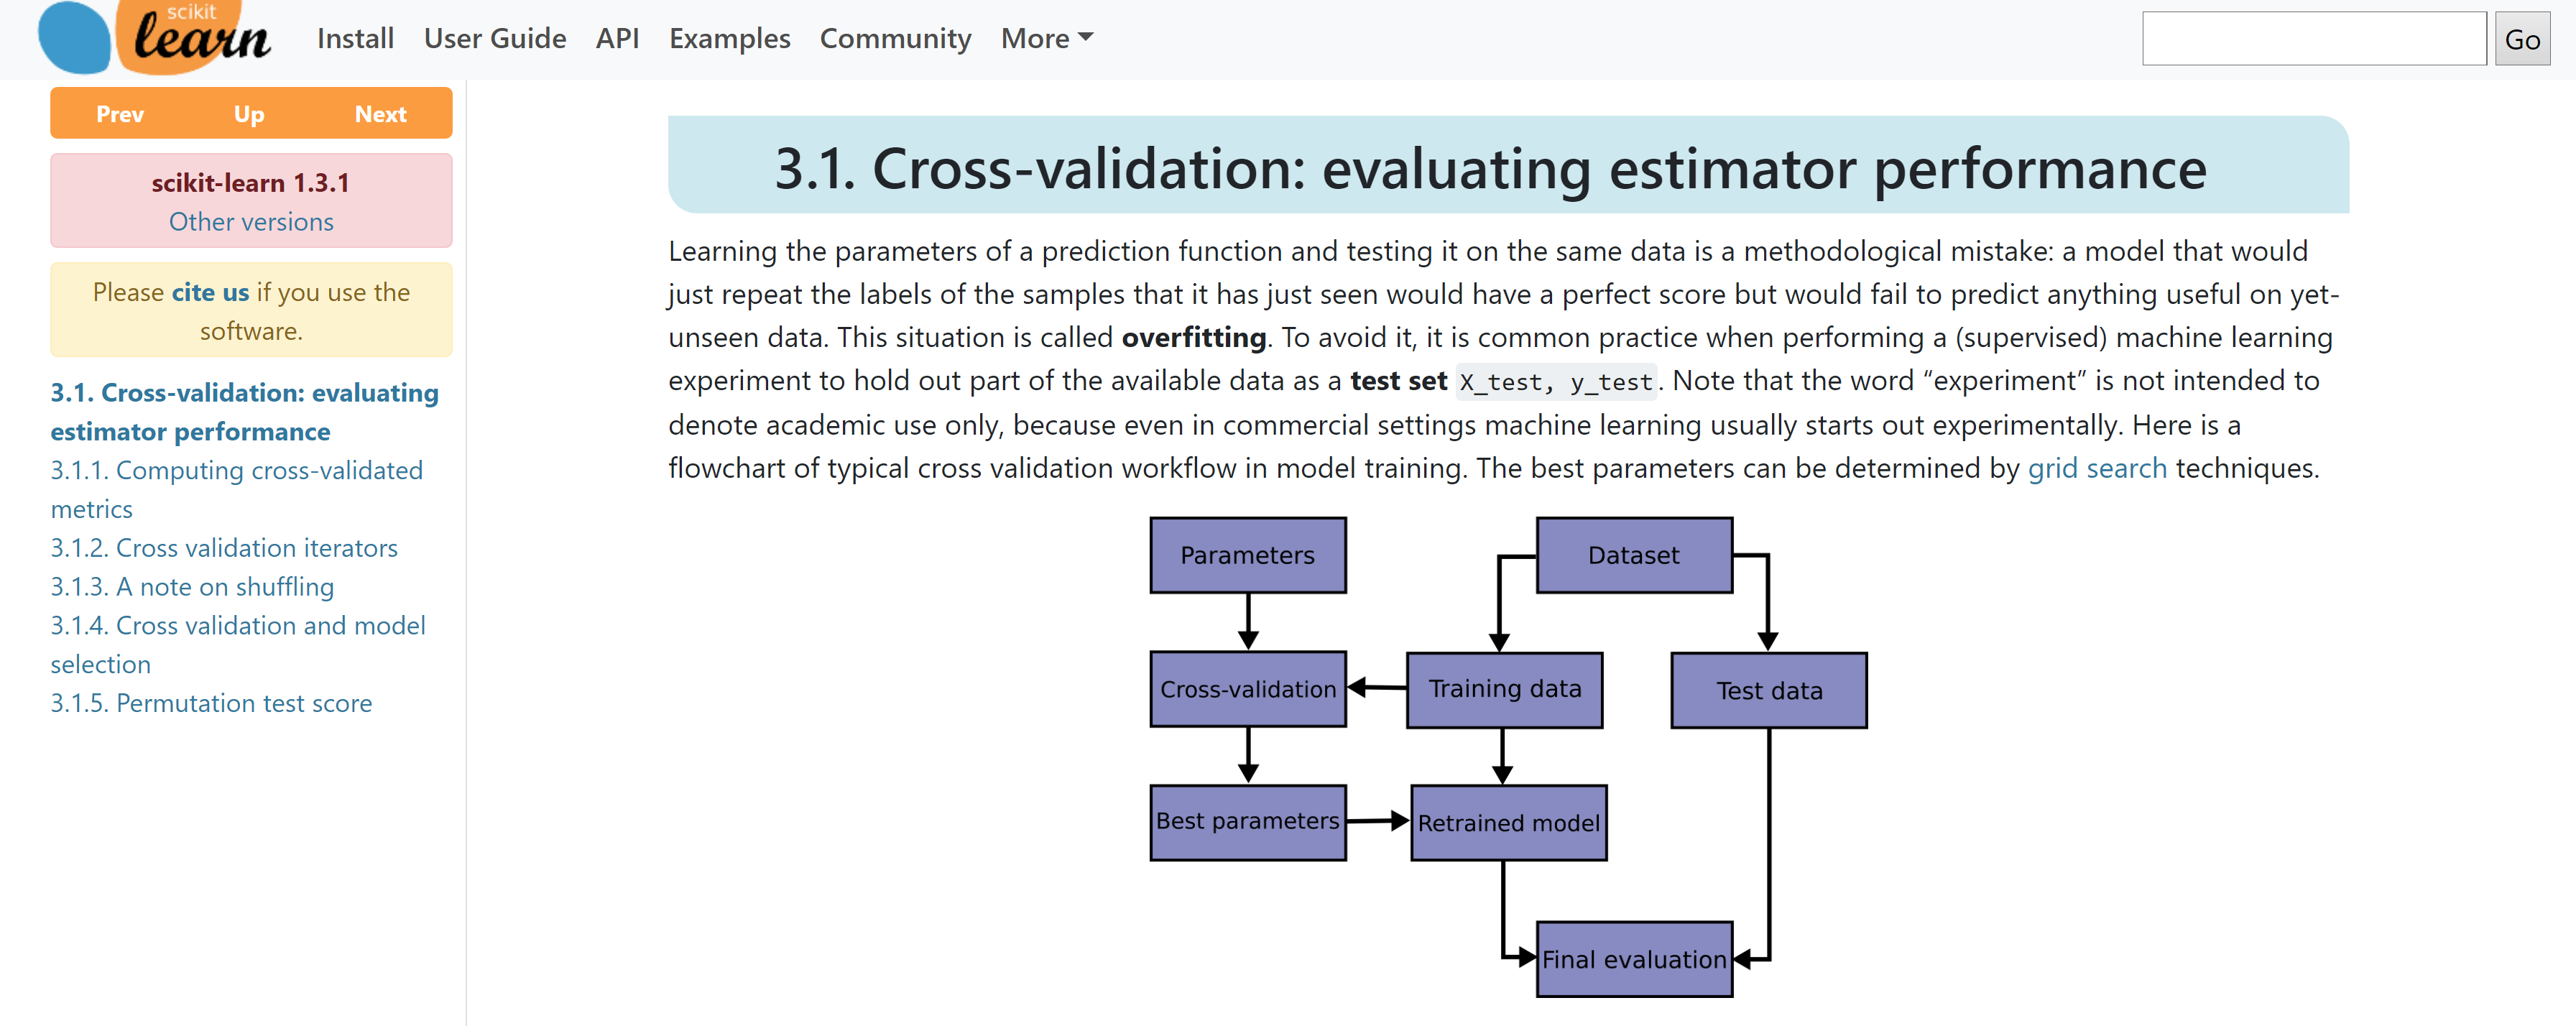

[3.1. Cross-validation: evaluating estimator performance](https://scikit-learn.org/stable/modules/cross_validation.html)

# Task 3

One tree is good, but where is the guarantee that it is the best, or at least close to it? One way to find a more or less optimal set of tree parameters is to search through many trees with different parameters and select the appropriate one.

There is a GridSearchCV class for this purpose,
going through each combination of parameters among those specified for the model, training it on data and conducting cross-validation. After this, the model with the best parameters is stored in the .best_estimator_ attribute.

This applies not only to trees, but also to other sklearn models.

Now the task is
enumerate all the trees on the iris data using the following parameters:
- maximum depth - from 1 to 10 levels
- the minimum number of samples for separation is from 2 to 10
- the minimum number of samples in a sheet is from 1 to 10

and save the best tree into the best_tree variable. Name the variable with GridSearchCV search

In [9]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data
y = iris.target

model = DecisionTreeClassifier()

In [10]:
# Hyperparameters
param_grid = {
    'max_depth': [x for x in range(1, 11)],
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 11)
}

In [11]:
# Train Grid Search
search = GridSearchCV(model, param_grid)
search.fit(X, y)
best_tree = search.best_estimator_
best_tree

DecisionTreeClassifier(max_depth=3, min_samples_split=4)

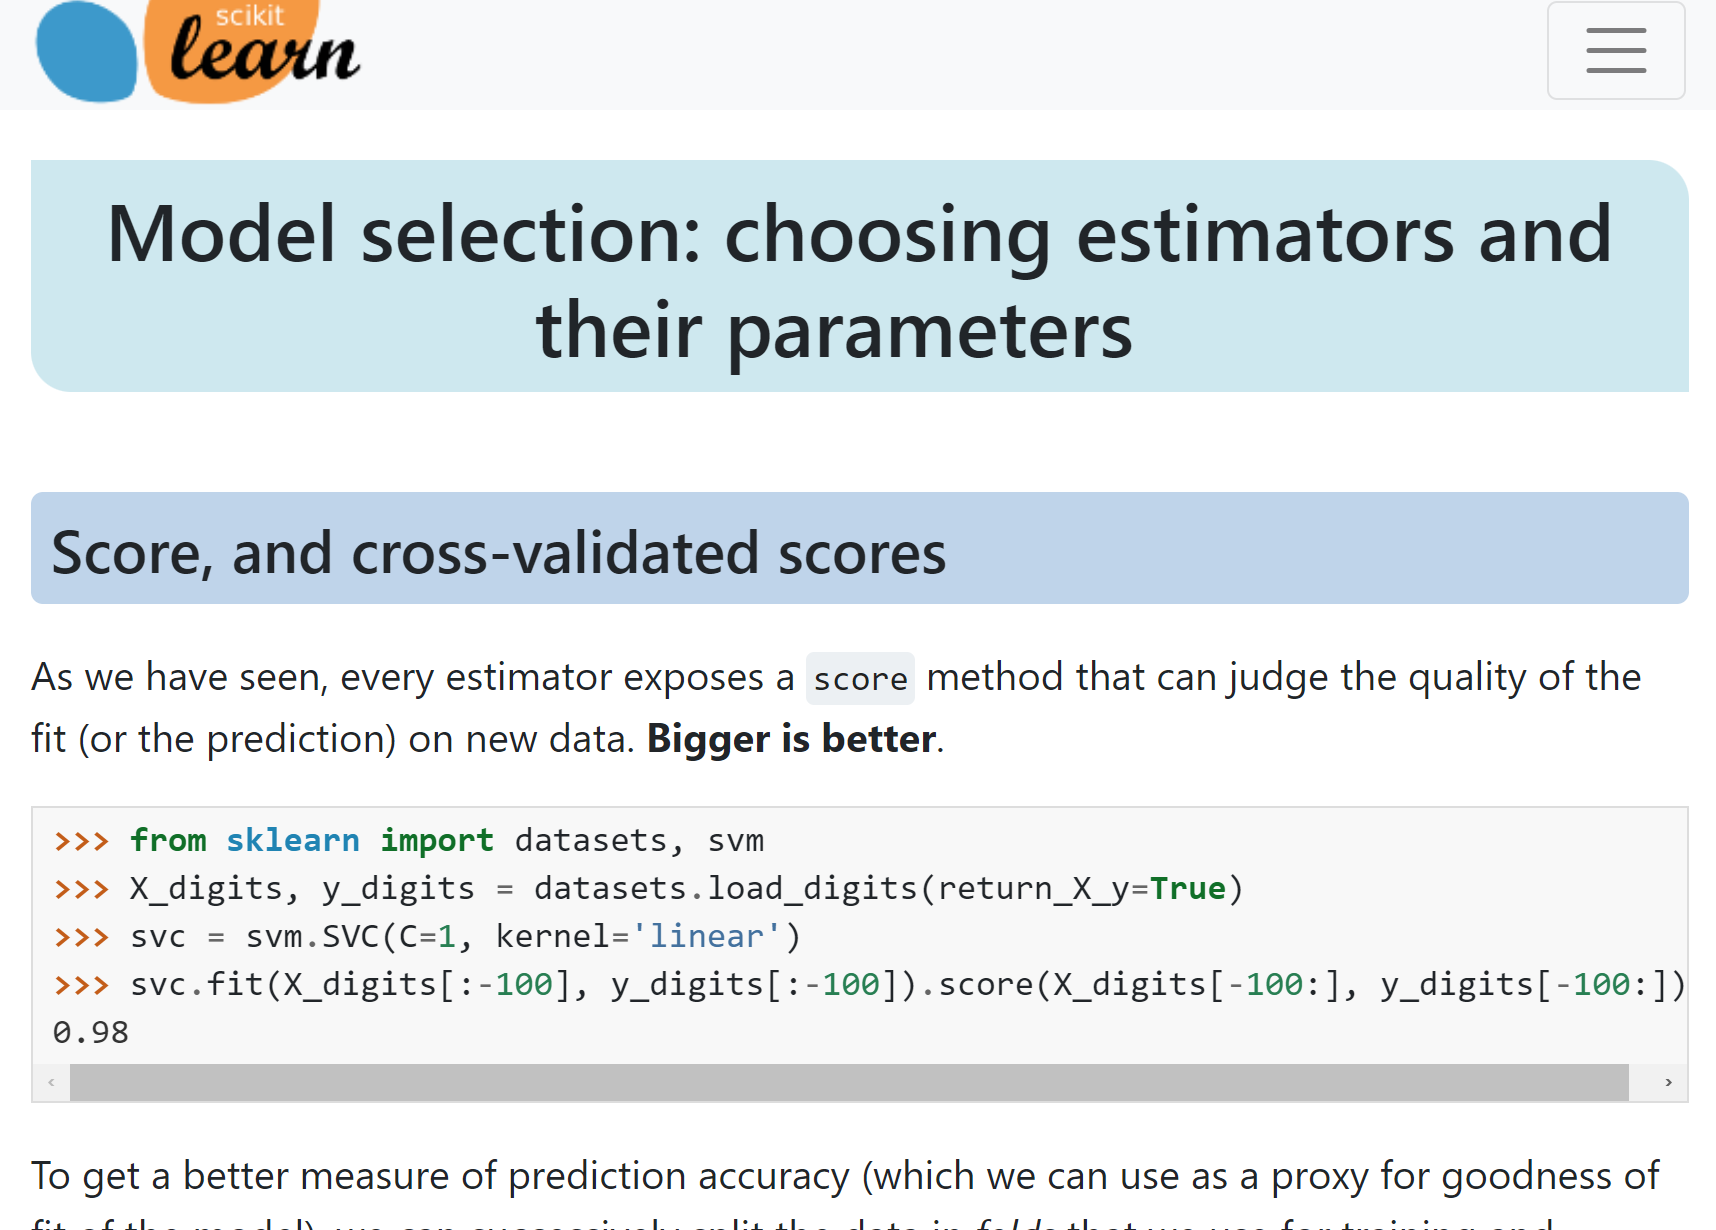

[Model selection: choosing estimators and their parameters](https://scikit-learn.org/stable/tutorial/statistical_inference/model_selection.html)

# Task 4

The more data, the complexity of the model and the number of its parameters, the longer the GridSearchCV search will take. However, there are times when a model is needed here and now, and that's what RandomizedSearchCV is for! By going through a random subsample of parameters, it searches for the best model and does this faster than a full search of parameters,
although it may miss the optimal parameters.

You can see a comparison of these searches here.

Let's search using the same parameters as in the previous task using RandomizedSearchCV

- maximum depth - from 1 to 10 levels
- the minimum number of samples for separation is from 2 to 10
- the minimum number of samples in a sheet is from 1 to 10

Save the best tree to the best_tree variable. Name the variable with RandomizedSearchCV search

In [12]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_iris

In [13]:
iris = load_iris()
X = iris.data
y = iris.target

In [14]:
param_distributions = {
    'max_depth': range(1, 11),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 11)
}

In [15]:
estimator = DecisionTreeClassifier()
search = RandomizedSearchCV(estimator, param_distributions)
search.fit(X, y)
best_tree = search.best_estimator_

In [16]:
print(best_tree)
print(search.best_params_)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=8)
{'min_samples_split': 8, 'min_samples_leaf': 4, 'max_depth': 7}


In [17]:
# Whole solution
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data
y = iris.target

estimator = DecisionTreeClassifier()
param_distributions = {
    'max_depth': range(1, 11),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 11)
}

search = RandomizedSearchCV(estimator, param_distributions)
search.fit(X, y)
best_tree = search.best_estimator_

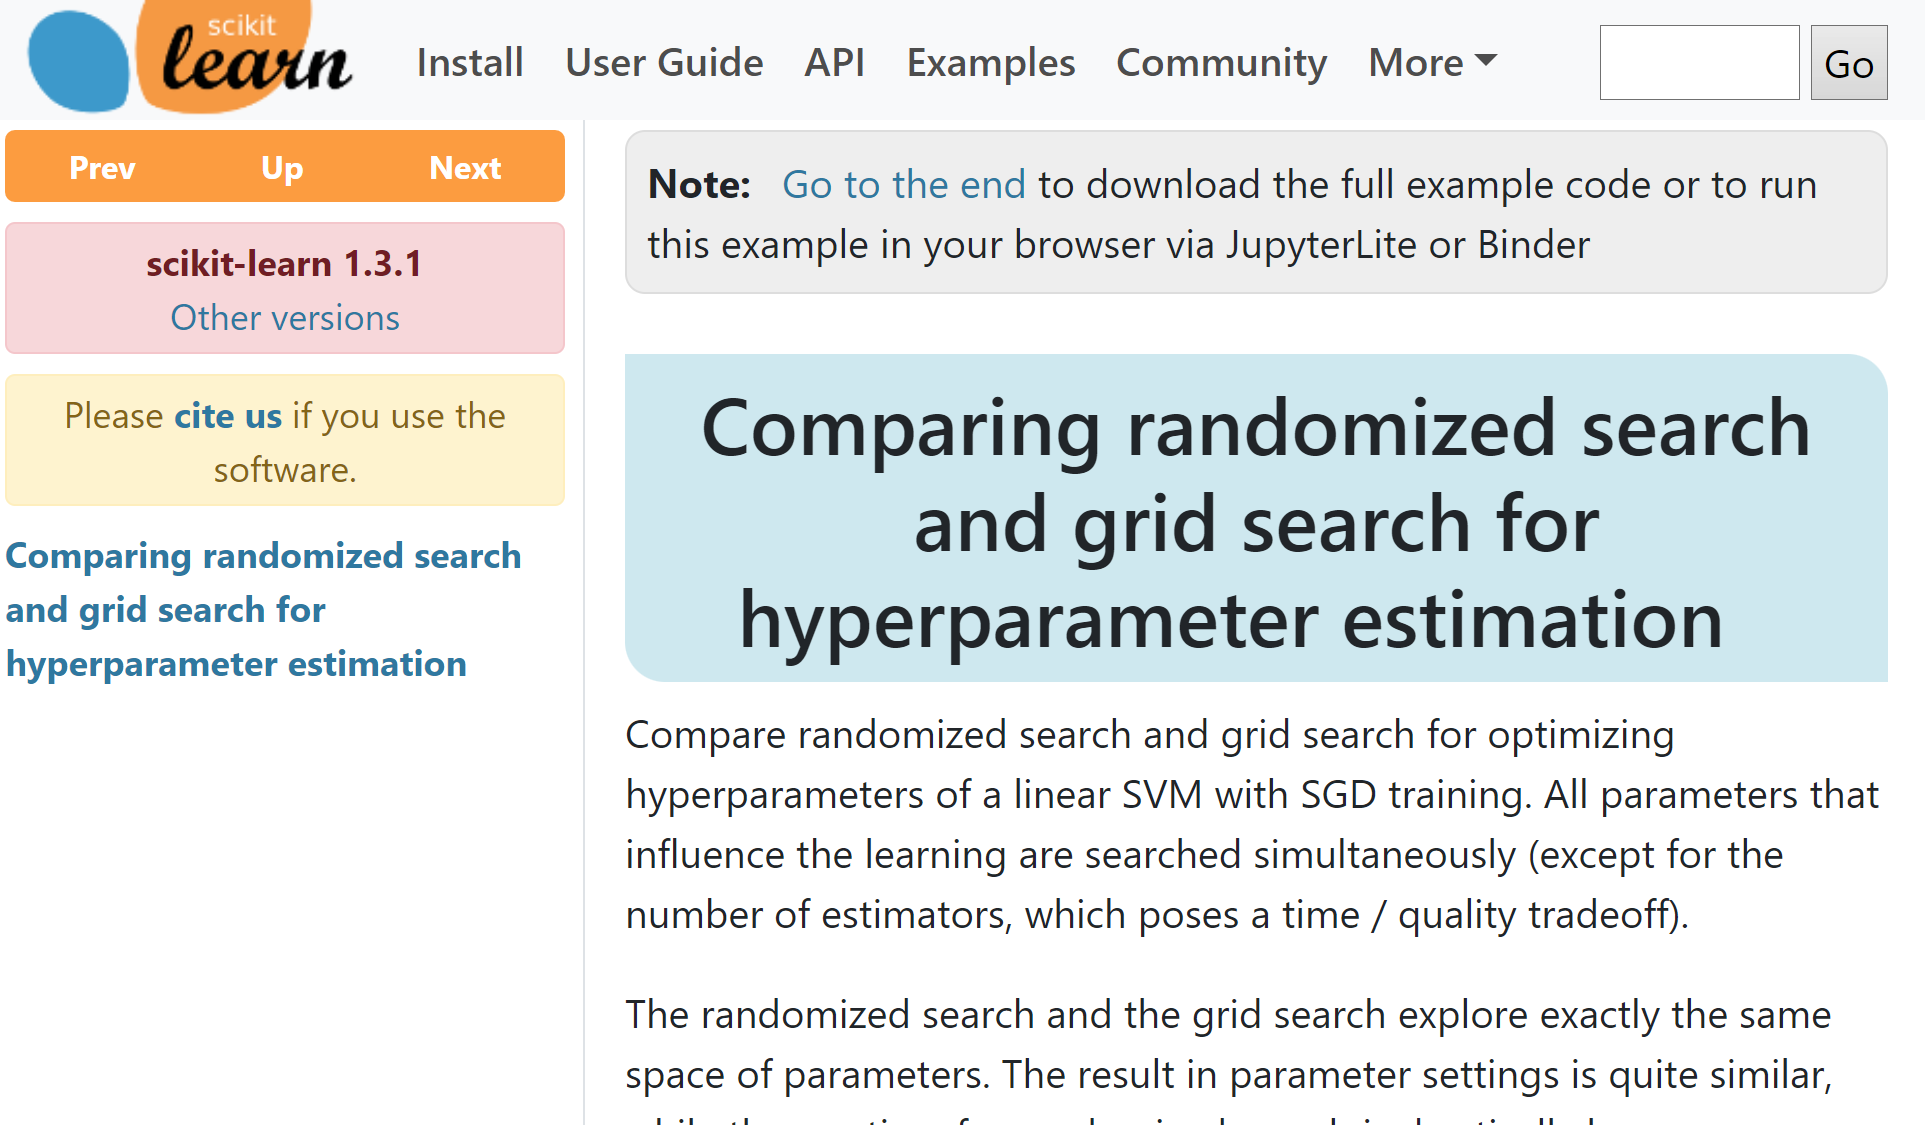

[Comparing randomized search and grid search for hyperparameter estimation](https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html#sphx-glr-auto-examples-model-selection-plot-randomized-search-py)

# Task 5

Let's use the techniques we've learned and make predictions!

There are 2 datasets that you can access:

- train - marked with known correct answers (stored in column y)
- test - the set where you need to predict them

Find the tree with the most suitable parameters using GridSearchCV and use it to predict the answers to 2-
Omu setu! Parameter boundaries as before:

- maximum depth - from 1 to 10 levels
- the minimum number of samples for separation is from 2 to 10
- the minimum number of samples in a sheet is from 1 to 10

The variable names are the same: the best tree is best_tree, GridSearchCV is search, and predictions are predictions

```Python
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


param_grid = {
    'max_depth': range(1, 11),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 11)
}

y_train = train.y
X_train = train.drop('y', axis=1)

estimator = DecisionTreeClassifier()
search = GridSearchCV(estimator, param_grid)
search.fit(X_train, y_train)

best_tree = search.best_estimator_
predictions = search.predict(test)
```

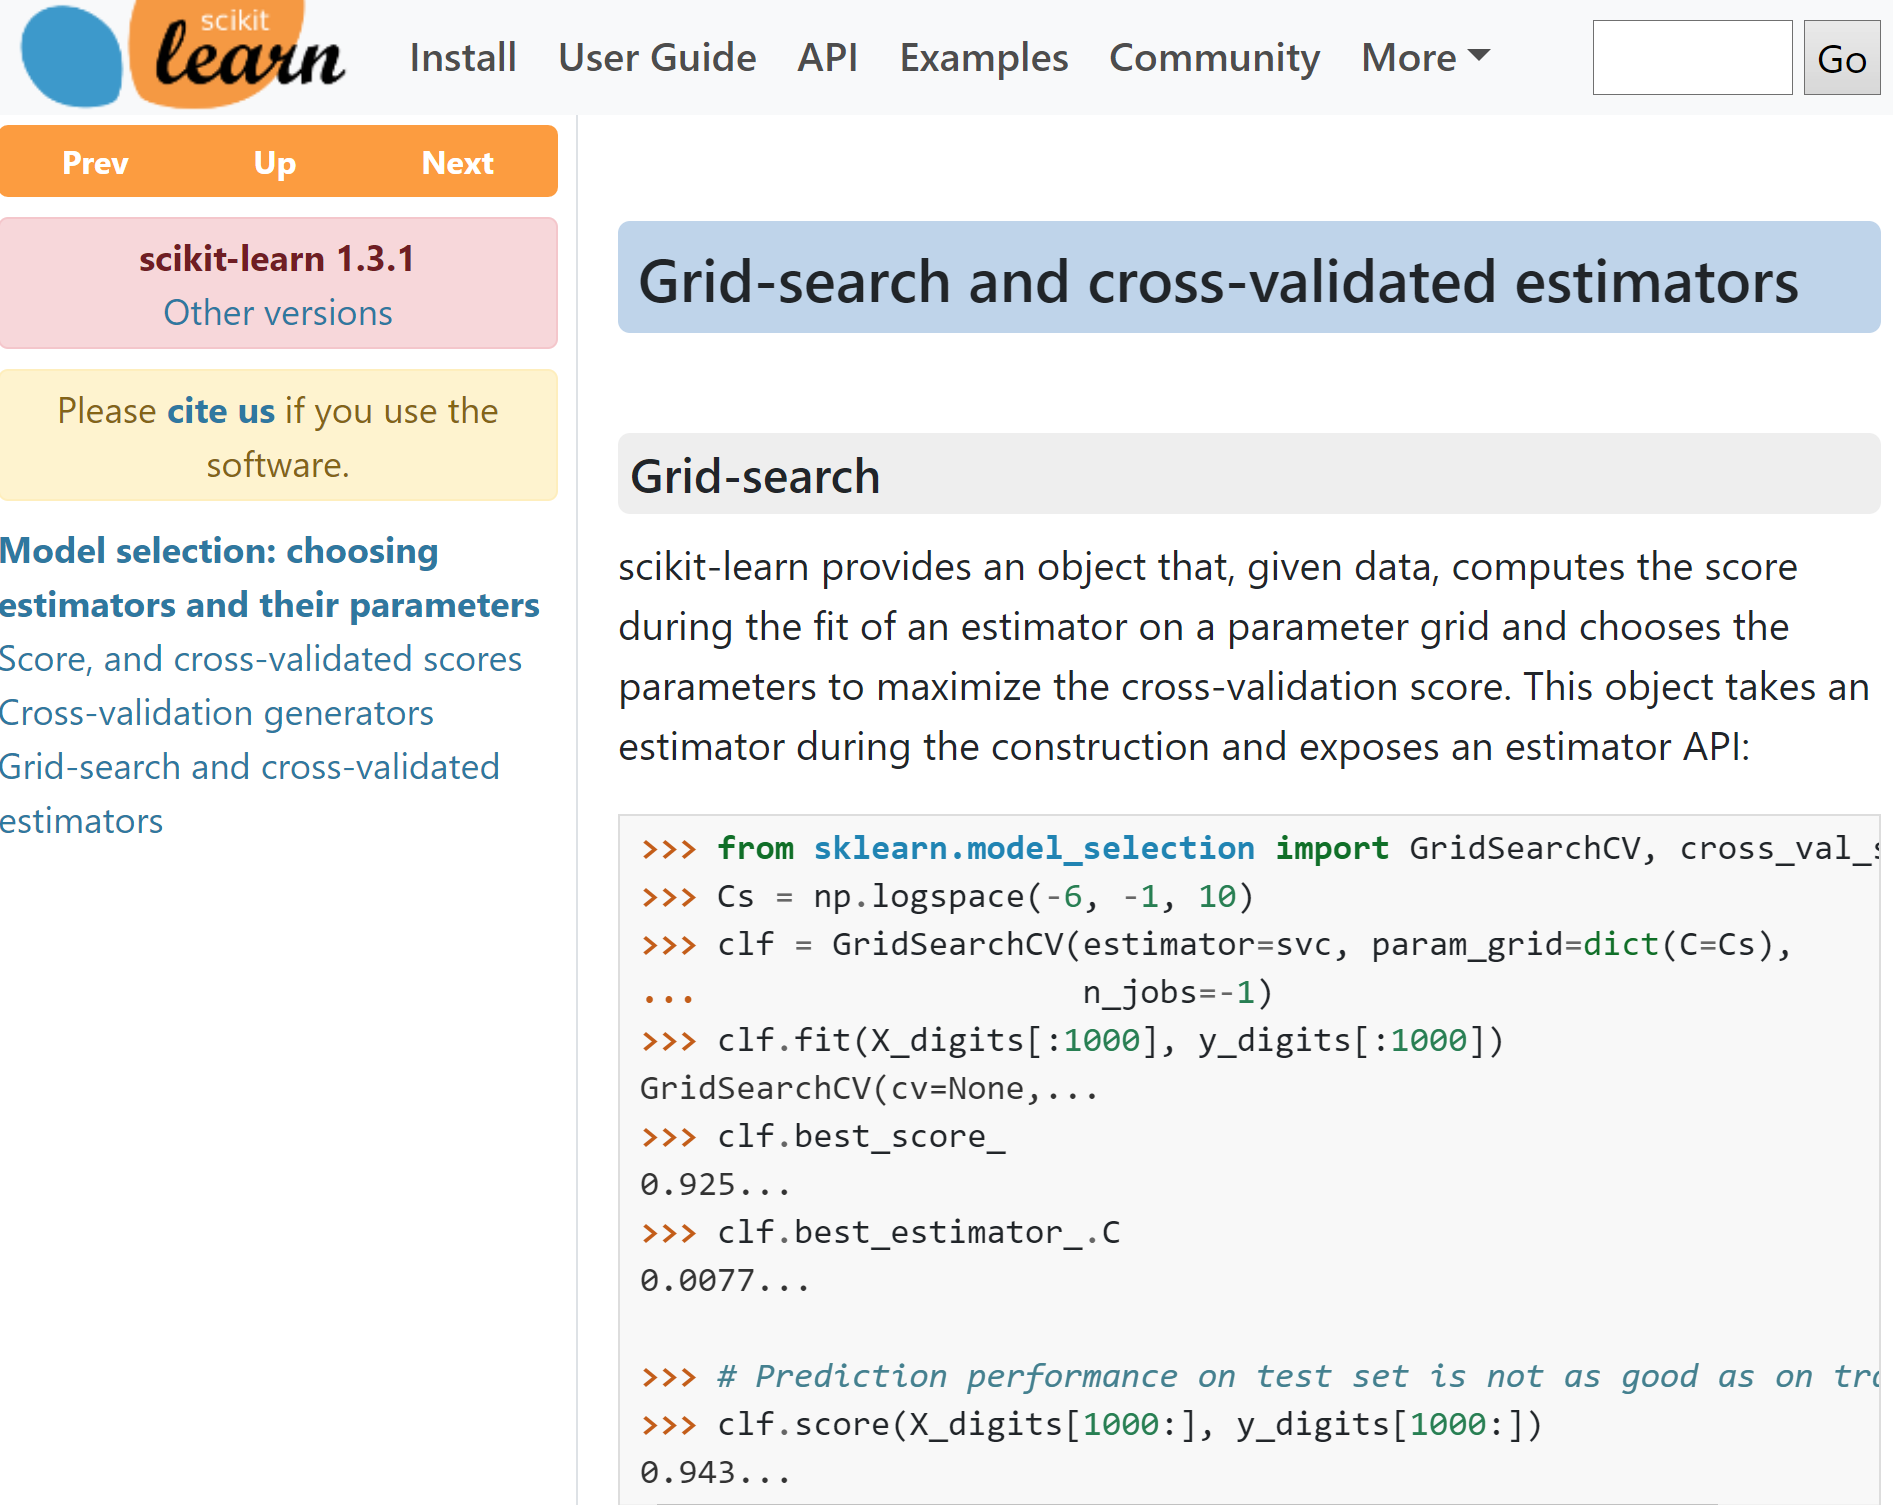

[Grid-search and cross-validated estimators](https://scikit-learn.org/stable/tutorial/statistical_inference/model_selection.html)

# Task 6

When classifying, the model can make errors by assigning an observation to the wrong class. There are various metrics for assessing the quality of predictions, which are based on 4 parameters - true positive, false positive, false negative and true negative, corresponding to the class that was assigned to the observations of each class. Matrix of 4-
ex (in the case of binary classification) these parameters are called confusion matrix.

In sklearn you can conveniently get it using the confusion_matrix function. You are given 2 archives with true classes of observations and predicted ones - y and predictions. Get a confusion matrix from them and place it in the conf_matrix variable.

```Python
import pandas as pd
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y, predictions)
```

# [sklearn.metrics.confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)